## Homework 3

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math


1) Newton's Method. Find the solution for

$8e^{-x} \sin(x) - 1 = 0$

Use $x_0 = 3.5$ and do it for 3 iteration. Also verify your answer(just do anything sensible).

In [2]:
def f(x):
    return 8*math.exp(-x)*math.sin(x)-1
def df(x):
    return 8*math.exp(-x)*(math.cos(x) - math.sin(x))
def next_x(x):
    return x-(f(x)/df(x))
def newtonSol(x):
    for i in range(3):
        c_val = next_x(x)
        x = c_val
    return x

ans= newtonSol(3.5)
print ans,f(ans)

-3.24899876047 21.0956033705


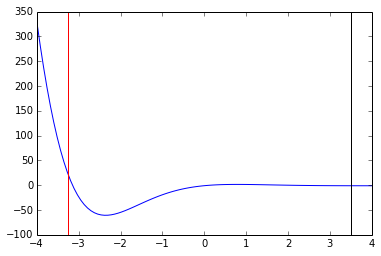

In [4]:
xs = np.linspace(-4,4,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.axvline(ans,c='r')
plt.axvline(3.5,c='k')

2) Back in the day before calculator has square root function. People use the "divide and average" method to calculate $\sqrt{a}$ where $a$ is a postive number. The method goes

 - Start with a number $x_0$, then the next guess for $a$ can be obtained by

$\displaystyle
x_{n+1} = \frac{x_n + a/x_n}{2}
$

 - Then you repeat and keep making the next guess.


2.1) Calculate $\sqrt{17}$ using this method. Pick a sensible value for $x_0$ and do it for 5 iterations.

In [4]:
def nextroot(x,a):
    return (x+a/x)/2.
def findroot(x,a,n):
    for i in range(n):
        c_val = nextroot(x,a)
        x = c_val
    return x

x = 8

findroot(x,17,5)
    

4.1231056256176615

2.2) Show that this method is equivalent to Newton's method.

Let $f(x) = x^2 - a = 0$ where $x = \sqrt a$

Newton's method: 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \\
x_{n+1} = x_n - \frac{x_n^2 - a}{2x_n} \\
x_{n+1} = \frac{2x_n}{2} - \frac{x_n - \frac{a}{x_n}}{2} \\
x_{n+1} = \frac{2x_n - x_n + \frac{a}{x_n}}{2} \\
x_{n+1} = \frac{x_n + \frac{a}{x_n}}{2} 
$$

2.3) Find an equivalent formula for finding cube root ($\sqrt[3]{a}$)

$x_{n+1} =  H(x_n)$

Find $H(x_n)$



Let $ H(x_n) = x^3 - a = 0$

Newton's method: 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \\
x_{n+1} = x_n - \frac{x_n^3 - a}{3x_n^2} \\
x_{n+1} = \frac{3x_n}{3} - \frac{x_n - \frac{a}{x_n^2}}{3} \\
x_{n+1} = \frac{3x_n - x_n + \frac{a}{x_n^2}}{3} \\
x_{n+1} = \frac{2x_n + \frac{a}{x_n^2}}{3} 
$$

2.4) Use the above method to find $\sqrt[3]{17}$

In [11]:
def nextcube(x,a):
    return (2*x+a/(x**2))/3.
def findcube(x,a,n):
    for i in range(n):
        c_val = nextcube(x,a)
        x = c_val
    return x

x = 8

print findcube(x,17,8),17**(1/3.)

2.57128159066 2.57128159066


3) One of the difficulty in using Newton's method is the fact that you need to find the derivative analytically.

We can work around that by using numerical derivative instead of analytical derivative.

Use the modified Newton's method to find solve

$\displaystyle
\frac{{xe^{\sin x}}}{(x+1)^2} = 0.1
$

Pick a sensible value for starting point and do it at least 5 iterations. Also verify that it converges to a solution.

3.68605644047


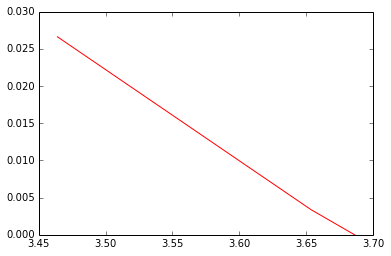

In [12]:
def f(x):
    return (x*(math.exp(math.sin(x))))/(x+1)**2 - 0.1
def df(x,h):
    return (f(x+h)-f(x-h))/(2*h)

def next_x(x,h):
    return x-(f(x)/df(x,h))

def newtonSol(x,h,n,a):
    for i in range(n):
        c_val = next_x(x,h)
        x = c_val
        a.append(x)
    return a
ans = []
ans = newtonSol(3,0.1,5,ans)
print ans[-1]
plt.plot(ans,[f(x) for x in ans],'r')

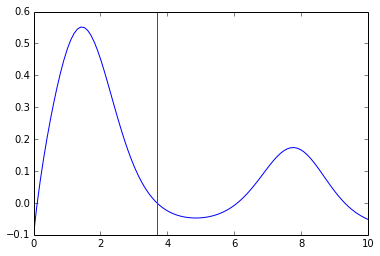

In [65]:
xs = np.linspace(0,10,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.axvline(ans[-1],c='r')
# plt.plot(ans,[f(x) for x in ans],'r')

4) Derivative Proof.

4.1) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)
$



$\displaystyle -f(x+2h) = -[f(x)+f'(x)2h+\frac{f''(x)4h^2}{2!}+\frac{f'''(\xi)8h^3}{3!}] $

$\displaystyle= -[f(x)+2f'(x)h + 2f''(x)h^2 + \frac{4f'''(\xi)h^3}{3}]$

$\displaystyle= -f(x)-2f'(x)h-2f''(x)h-\frac{4f'''(\xi)h^3}{3}$



$\displaystyle 4f(x+h) = 4[f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(\xi')h^3}{3!}] $

$= 4f(x)+4f'(x)h+ 2f''(x)h^2+\frac{2f'''(\xi')h^3}{3} $

$f'(x) = \frac{-f(x)-2f'(x)h-2f''(x)h-\frac{4f'''(\xi)h^3}{3} + 4f(x)+4f'(x)h+ 2f''(x)h^2+\frac{2f'''(\xi')h^3}{3} - 3f(x)}{2h}  $

$f'(x) = \frac{2f'(x)h-\frac{4f'''(\xi)h^3}{3}+\frac{2f'''(\xi')h^3}{3}}{2h}$

$f'(x) = f'(x)-\frac{2f'''(\xi)h^2}{3}+\frac{f'''(\xi')h^2}{3}$

error term = $\frac{2f'''(\xi)h^2}{3}+\frac{f'''(\xi')h^2}{3} = O(h^2)$

4.2) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f''(x) = \frac{f(x+h) -2f(x) + f(x-h)}{h^2} + O(h^2)
$

$f(x+h) = f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(x)h^3}{3!} + \frac{f^{(4)}(\xi)h^4}{4!}$

$f(x-h) = f(x)-f'(x)h+\frac{f''(x)h^2}{2!}-\frac{f'''(x)h^3}{3!} + \frac{f^{(4)}(\xi')h^4}{4!}$

$f'(x) = \frac{f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(x)h^3}{3!}+ \frac{f^{(4)}(\xi)h^4}{4!} -2f(x) + f(x)-f'(x)h+\frac{f''(x)h^2}{2!}-\frac{f'''(x)h^3}{3!}+ \frac{f^{(4)}(\xi')h^4}{4!}}{h^2}$

$f'(x) = \frac{f''(x)h^2 + \frac{f^{(4)}(\xi)h^4}{4!} + \frac{f^{(4)}(\xi')h^4}{4!}}{h^2}$

$f'(x) = f''(x) + \frac{f^{(4)}(\xi)h^2}{4!} + \frac{f^{(4)}(\xi')h^2}{4!}$

error term = $\frac{h^2}{4!}(f^{(4)}(\xi)+f^{(4)}(\xi'))$

4.3) Let $f(x) = xe^{-x}$. Use the formula in 4.1) to find the "first" derivative of $f(x)$ and plot the first derivative for $x \in [0,1]$. Pick appropriate value for $h$.

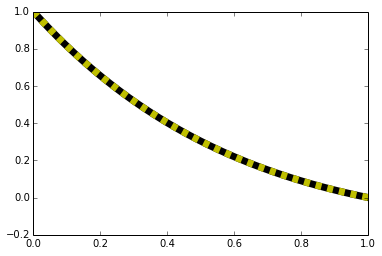

In [79]:
def f(x):
    return x*math.exp(-x)
def df(x,h):
    return (-f(x+2*h)+4*f(x+h)-3*f(x))/(2*h)
def cheat(x):
    return math.exp(-x)*(1-x) #-x*math.exp(-x)+math.exp(-x) 

xs=np.linspace(0,1,100)
ys = [cheat(x) for x in xs]
ans = [df(x,0.01) for x in xs]

plt.plot(xs,ys,'k',lw=7)
plt.plot(xs,ans,'y',ls='--',lw=7)


4.4) Let $f(x) = xe^{-x}$. Use the formula in 4.2) to find the "second" derivative of $f(x)$ and plot the second derivative for $x \in [0,1]$

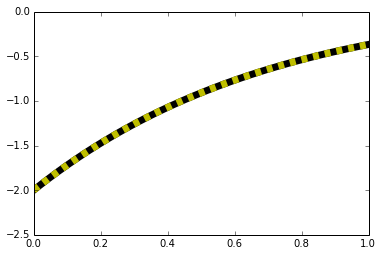

In [80]:
def cheat2(x):
    return math.exp(-x)*(-1) - (1-x)*math.exp(-x)
def ddf(x,h):
    return (f(x+h) - 2*f(x) + f(x-h))/h**2
xs = np.linspace(0,1,100)
ys = [cheat2(x) for x in xs]
ans = [ddf(x,0.01) for x in xs]

plt.plot(xs,ys,'k',lw=7)
plt.plot(xs,ans,'y',ls='--',lw=7)

5) Edge Detection. The goal for this problem is to make a picture that looks like chopper_edge.png

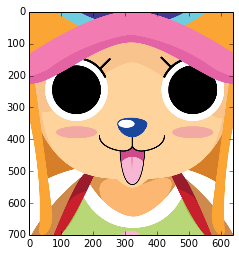

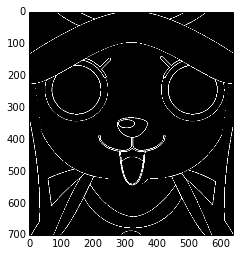

In [8]:
#Here is how you read a png picture(you can read jpeg too if you have necessary library installed)
chopper = plt.imread('chopper.png')
plt.imshow(chopper)
plt.figure()
chopper_edge = plt.imread('chopper_edge.png')
plt.imshow(chopper_edge)

In [9]:
#The picture is kept in a 2-D array of pixels
#you can access the pixel value of the image using array indexing
#chopper[y, x]

print chopper[250,150] #this is the eye it should be black [R,G,B] = [0,0,0]
print chopper[350,350] #this is his nose the Blue should be dominant [R,G,B] = [0,0,1]

#We can also get the dimension of the image by
print chopper.shape #[n_y, n_x, RGB]

[ 0.  0.  0.]
[ 0.10196079  0.27843139  0.61960787]
(700, 638, 3)


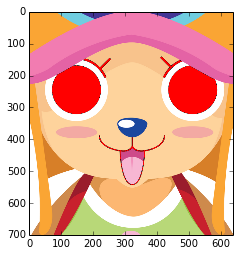

In [10]:
#Here is an example on how to create a new image based on old image
#Here I tried to compute the luminosity of each pixel.
#if the luminosity is close to zero(black) [0,0,0], then set that value to red
#otherwise just copy the pixel value(color) from old image

old_image_dim = chopper.shape
#Let us learn about how to create a new empty image based on old image
new_image = np.empty(old_image_dim)

for i in range(chopper.shape[0]): #first dimension of chopper
    for j in range(chopper.shape[1]): #second dimension of chopper
        luminosity = sum((chopper[i,j])**2)
        if luminosity < 1e-3: #if the pixel is close to black then
            new_image[i,j] = [1,0,0] #paint it red
        else:#otherwise
            new_image[i,j] = chopper[i,j] #copy pixel from chopper

plt.imshow(new_image) #this may take a while (mine takes 7s)

5.1) Write the function edgeness returns a "float" quantity that is high if the pixel is different from neighboring pixels. I recommend sum of square difference.

In [11]:
bottomp = chopper[1:-1,1:-1] - chopper[0:-2,1:-1]
topp = chopper[0:-2,1:-1] - chopper[1:-1,1:-1]
rightp = chopper[1:-1,1:-1] - chopper[1:-1,0:-2]
leftp = chopper[1:-1,0:-2] - chopper[1:-1,1:-1]

different 9.0
same 0.0


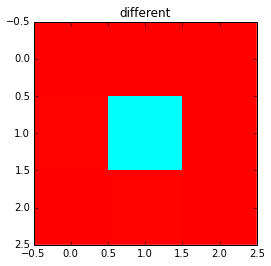

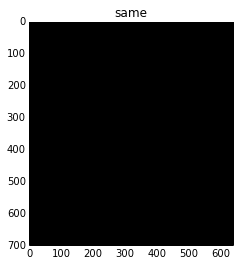

In [13]:
def norm_s(v):
    return (v[0]**2 + v[1]**2 + v[2]**2)**2

def edgeness(pic,y,x):
    selfp = pic[y][x]
    topp = pic[y-1][x]
    leftp = pic[y][x-1]
    rightp = pic[y][x+1]
    botp = pic[y+1][x]
    
    v= norm_s(topp-selfp)
    v+= norm_s(botp-selfp)
    v+= norm_s(rightp-selfp)
    v+= norm_s(leftp-selfp)
    
    return v/4.


edge = np.zeros(chopper.shape)
# edge.shape
# ny,nx,d=edge.shape
# for iy in xrange(1,ny-1):
#     for ix in xrange(1,nx-1):
#         edge[iy,ix] = edgeness(chopper,iy,ix)
        
#to help you with testing
different = np.empty((3,3,3))
different[:,:] = [1,0,0]
different [1,1] = [0,1,1]
plt.imshow(different, interpolation='none')
plt.title("different")
print 'different', edgeness(different, 1, 1) #this should return a high value

plt.figure()
same = np.empty((3,3,3))
same[:,:] = [1,0,0]
plt.imshow(same, interpolation='none')
plt.title("same")
print 'same', edgeness(same, 1, 1) #this should return a really low value(like 0)

plt.imshow(edge)

In [16]:
#Now we will apply it to the whole image

new_image = np.zeros(chopper.shape)

new_image[:,:,:] = 0.1 #make everything black

threshold = 0.0015#You will need to play around with this number

for i in range(1,chopper.shape[0]-1): #first dimension of chopper
    for j in range(1,chopper.shape[1]-1): #second dimension of chopper
        edge = edgeness(chopper,i,j)
        if edge > threshold: #if the pixel edgess is more than some threshould
            new_image[i,j] = [1.0,1.0,1.0] #paint it white
            

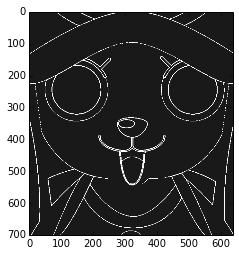

In [17]:
plt.imshow(new_image)

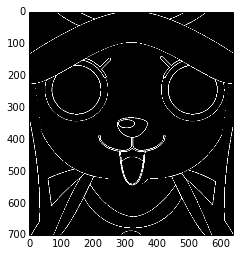

In [157]:
plt.imshow(chopper_edge)